In [1]:
import numpy as np
from skimage.transform import resize
# import pandas and numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import tifffile as tiff
import os

/tmp/ipykernel_5324/2707674355.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
submission_df = pd.read_csv('/root/sennet-kaggle/src/util/2d_nn/2_1_fixed_kidney_1_dense_true_labels.csv')

def rle_decode(mask_rle, shape):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)

# slices = []
# for row in submission_df.itertuples():
#     slices.append()
kindey_1_dense_fixed = torch.stack(
    [torch.tensor(rle_decode(row.rle, (1303, 912)))
    for row in submission_df.itertuples()]
).unsqueeze(0).bool().numpy()


In [3]:
kindey_1_dense_fixed.shape

(1, 2279, 1303, 912)

In [4]:
kidney_1_dense_fixed = kindey_1_dense_fixed.squeeze(0)

In [12]:
kidney_1_size = '/root/data/train/kidney_1_dense/labels/0732.tif'

In [5]:
kidney_1_dense = tiff.imread(kidney_1_size)

NameError: name 'kidney_1_size' is not defined

In [11]:
kidney_1_dense_fixed.shape

(2279, 1303, 912)

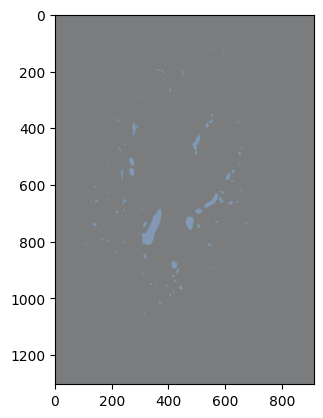

In [15]:
plt.imshow(kidney_1_dense, cmap='gray')
plt.imshow(kidney_1_dense_fixed[732,:,:], cmap='Blues', alpha=0.5)  

In [6]:
os.mkdir('/root/data/train/kidney_1_dense/labels_fixed_2')

In [8]:
from skimage import io

In [9]:
# save images
for i in range(0, kidney_1_dense_fixed.shape[0]):
    # use zfill to add leading zeros to i
    io.imsave('/root/data/train/kidney_1_dense/labels_fixed_2/' + str(i).zfill(4) + '.tif', kidney_1_dense_fixed[i,:,:])


/tmp/ipykernel_5324/3444670418.py:4: UserWarning: /root/data/train/kidney_1_dense/labels_fixed_2/0000.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('/root/data/train/kidney_1_dense/labels_fixed_2/' + str(i).zfill(4) + '.tif', kidney_1_dense_fixed[i,:,:])
/tmp/ipykernel_5324/3444670418.py:4: UserWarning: /root/data/train/kidney_1_dense/labels_fixed_2/0000.tif is a low contrast image
  io.imsave('/root/data/train/kidney_1_dense/labels_fixed_2/' + str(i).zfill(4) + '.tif', kidney_1_dense_fixed[i,:,:])
/tmp/ipykernel_5324/3444670418.py:4: UserWarning: /root/data/train/kidney_1_dense/labels_fixed_2/0001.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('/root/data/train/kidney_1_dense/labels_fixed_2/' + str(i).zfill(4) + '.tif', kidney_1_dense_fixed[i,:,:])
/tmp/ipykernel_5324/3444670418.py:4: UserWarning: